<a href="https://colab.research.google.com/github/hahoyeah/dacon/blob/main/%EC%87%BC%ED%95%91%EB%A7%A4%EC%B6%9C%EC%95%A1%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 데이콘에서 진행한 basic 쇼핑매출액 예측 대회에 참여하여 데이콘에서 준 베이스라인을 기초로 나만의 분석을 실행했다.

# 1. 준비

- 한글 폰트 적용

런타임 다시시작후, 다시 실행

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

- 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/쇼핑/train.csv')
test = pd.read_csv('/content/drive/MyDrive/쇼핑/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/쇼핑/sample_submission.csv')

# 2. 데이터 확인

In [ ]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [ ]:
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [ ]:
test.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


In [ ]:
test.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False
179,180,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,8.667,False


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            180 non-null    int64  
 1   Store         180 non-null    int64  
 2   Date          180 non-null    object 
 3   Temperature   180 non-null    float64
 4   Fuel_Price    180 non-null    float64
 5   Promotion1    178 non-null    float64
 6   Promotion2    45 non-null     float64
 7   Promotion3    161 non-null    float64
 8   Promotion4    146 non-null    float64
 9   Promotion5    180 non-null    float64
 10  Unemployment  180 non-null    float64
 11  IsHoliday     180 non-null    bool   
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
sample_submission

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [ ]:
# describe 메소드는 기초 통계량을 보여줍니다.
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


### 로그변환

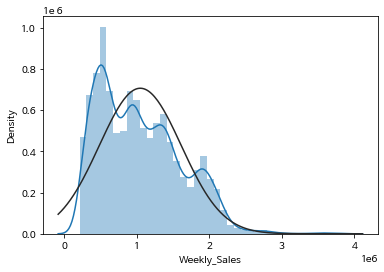

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sns.distplot(train['Weekly_Sales'], fit=stats.norm)

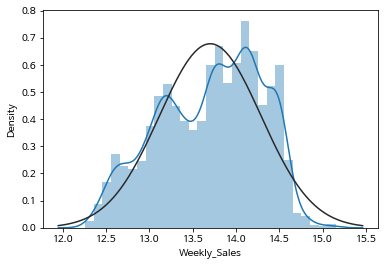

In [ ]:
sns.distplot(np.log1p(train['Weekly_Sales']), fit=stats.norm)

- 로그변환으로 해주니까 더 정규분포에 가깝다... 로그를 써먹자!

# 데이터 전처리

## 2. Date 전처리

 분석을 위해 "일/월/년도" 형식의 문자를 숫자로 변환

In [ ]:
def date_encoder(date):
  day, month, year = map(int, date.split('/'))
  return day, month, year

train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])

train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,5,2,2010
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,12,2,2010
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,19,2,2010
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,26,2,2010
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


### 프로모션은 언제부터 진행된걸까..?

In [ ]:
train[train['Year']==2010].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 6163
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2160 non-null   int64  
 1   Store         2160 non-null   int64  
 2   Date          2160 non-null   object 
 3   Temperature   2160 non-null   float64
 4   Fuel_Price    2160 non-null   float64
 5   Promotion1    0 non-null      float64
 6   Promotion2    0 non-null      float64
 7   Promotion3    0 non-null      float64
 8   Promotion4    0 non-null      float64
 9   Promotion5    0 non-null      float64
 10  Unemployment  2160 non-null   float64
 11  IsHoliday     2160 non-null   bool   
 12  Weekly_Sales  2160 non-null   float64
 13  Day           2160 non-null   int64  
 14  Month         2160 non-null   int64  
 15  Year          2160 non-null   int64  
dtypes: bool(1), float64(9), int64(5), object(1)
memory usage: 272.1+ KB


In [ ]:
train[train['Year']==2011].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 48 to 6215
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2340 non-null   int64  
 1   Store         2340 non-null   int64  
 2   Date          2340 non-null   object 
 3   Temperature   2340 non-null   float64
 4   Fuel_Price    2340 non-null   float64
 5   Promotion1    354 non-null    float64
 6   Promotion2    293 non-null    float64
 7   Promotion3    342 non-null    float64
 8   Promotion4    302 non-null    float64
 9   Promotion5    360 non-null    float64
 10  Unemployment  2340 non-null   float64
 11  IsHoliday     2340 non-null   bool   
 12  Weekly_Sales  2340 non-null   float64
 13  Day           2340 non-null   int64  
 14  Month         2340 non-null   int64  
 15  Year          2340 non-null   int64  
dtypes: bool(1), float64(9), int64(5), object(1)
memory usage: 294.8+ KB


In [ ]:
train[train['Year']==2012].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 100 to 6254
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1755 non-null   int64  
 1   Store         1755 non-null   int64  
 2   Date          1755 non-null   object 
 3   Temperature   1755 non-null   float64
 4   Fuel_Price    1755 non-null   float64
 5   Promotion1    1748 non-null   float64
 6   Promotion2    1299 non-null   float64
 7   Promotion3    1543 non-null   float64
 8   Promotion4    1517 non-null   float64
 9   Promotion5    1755 non-null   float64
 10  Unemployment  1755 non-null   float64
 11  IsHoliday     1755 non-null   bool   
 12  Weekly_Sales  1755 non-null   float64
 13  Day           1755 non-null   int64  
 14  Month         1755 non-null   int64  
 15  Year          1755 non-null   int64  
dtypes: bool(1), float64(9), int64(5), object(1)
memory usage: 221.1+ KB


In [ ]:
train[train['Year']==2011].loc[80:100]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
80,81,1,19/08/2011,89.94,3.554,NaN,NaN,NaN,NaN,NaN,7.962,False,1530761.43,19,8,2011
81,82,1,26/08/2011,87.96,3.523,NaN,NaN,NaN,NaN,NaN,7.962,False,1464693.46,26,8,2011
82,83,1,02/09/2011,87.83,3.533,NaN,NaN,NaN,NaN,NaN,7.962,False,1550229.22,2,9,2011
83,84,1,09/09/2011,76.00,3.546,NaN,NaN,NaN,NaN,NaN,7.962,True,1540471.24,9,9,2011
84,85,1,16/09/2011,79.94,3.526,NaN,NaN,NaN,NaN,NaN,7.962,False,1514259.78,16,9,2011
85,86,1,23/09/2011,75.80,3.467,NaN,NaN,NaN,NaN,NaN,7.962,False,1380020.27,23,9,2011
86,87,1,30/09/2011,79.69,3.355,NaN,NaN,NaN,NaN,NaN,7.962,False,1394561.83,30,9,2011
87,88,1,07/10/2011,69.31,3.285,NaN,NaN,NaN,NaN,NaN,7.866,False,1630989.95,7,10,2011
88,89,1,14/10/2011,71.74,3.274,NaN,NaN,NaN,NaN,NaN,7.866,False,1493525.93,14,10,2011
89,90,1,21/10/2011,63.71,3.353,NaN,NaN,NaN,NaN,NaN,7.866,False,1502562.78,21,10,2011


- 2011년 11월부터 프로모션이 생겼다...!

- 그럼 2011년 11월 이전의 프로모션 결측값을 0으로 해주고, 나머지 결측값은 스플라인 보간법을 이용하여 구해주자...!

In [ ]:
train[train['Store']==2].loc[220:240]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
220,221,2,26/08/2011,90.45,3.523,NaN,NaN,NaN,NaN,NaN,7.852,False,1821139.91,26,8,2011
221,222,2,02/09/2011,89.64,3.533,NaN,NaN,NaN,NaN,NaN,7.852,False,1809119.70,2,9,2011
222,223,2,09/09/2011,77.97,3.546,NaN,NaN,NaN,NaN,NaN,7.852,True,1748000.65,9,9,2011
223,224,2,16/09/2011,78.85,3.526,NaN,NaN,NaN,NaN,NaN,7.852,False,1691439.52,16,9,2011
224,225,2,23/09/2011,75.58,3.467,NaN,NaN,NaN,NaN,NaN,7.852,False,1669299.78,23,9,2011
225,226,2,30/09/2011,78.14,3.355,NaN,NaN,NaN,NaN,NaN,7.852,False,1650394.44,30,9,2011
226,227,2,07/10/2011,69.92,3.285,NaN,NaN,NaN,NaN,NaN,7.441,False,1837553.43,7,10,2011
227,228,2,14/10/2011,71.67,3.274,NaN,NaN,NaN,NaN,NaN,7.441,False,1743882.19,14,10,2011
228,229,2,21/10/2011,64.53,3.353,NaN,NaN,NaN,NaN,NaN,7.441,False,1834680.25,21,10,2011
229,230,2,28/10/2011,65.87,3.372,NaN,NaN,NaN,NaN,NaN,7.441,False,1769296.25,28,10,2011


In [ ]:
train[train['Store']==2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 139 to 277
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            139 non-null    int64  
 1   Store         139 non-null    int64  
 2   Date          139 non-null    object 
 3   Temperature   139 non-null    float64
 4   Fuel_Price    139 non-null    float64
 5   Promotion1    47 non-null     float64
 6   Promotion2    41 non-null     float64
 7   Promotion3    46 non-null     float64
 8   Promotion4    47 non-null     float64
 9   Promotion5    47 non-null     float64
 10  Unemployment  139 non-null    float64
 11  IsHoliday     139 non-null    bool   
 12  Weekly_Sales  139 non-null    float64
 13  Day           139 non-null    int64  
 14  Month         139 non-null    int64  
 15  Year          139 non-null    int64  
dtypes: bool(1), float64(9), int64(5), object(1)
memory usage: 17.5+ KB


### 2011.11.11 이전 결측값 0

In [ ]:
train['Store'].value_counts()

1     139
24    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
25    139
23    139
2     139
22    139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
45    139
Name: Store, dtype: int64

In [ ]:
for i in range(1,46):
  train.loc[:91+139*(i-1)]=train.loc[:91+139*(i-1)].fillna(0)

In [ ]:
train[train['Store']==2].loc[220:240]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
220,221,2,26/08/2011,90.45,3.523,0.00,0.00,0.00,0.00,0.00,7.852,False,1821139.91,26,8,2011
221,222,2,02/09/2011,89.64,3.533,0.00,0.00,0.00,0.00,0.00,7.852,False,1809119.70,2,9,2011
222,223,2,09/09/2011,77.97,3.546,0.00,0.00,0.00,0.00,0.00,7.852,True,1748000.65,9,9,2011
223,224,2,16/09/2011,78.85,3.526,0.00,0.00,0.00,0.00,0.00,7.852,False,1691439.52,16,9,2011
224,225,2,23/09/2011,75.58,3.467,0.00,0.00,0.00,0.00,0.00,7.852,False,1669299.78,23,9,2011
225,226,2,30/09/2011,78.14,3.355,0.00,0.00,0.00,0.00,0.00,7.852,False,1650394.44,30,9,2011
226,227,2,07/10/2011,69.92,3.285,0.00,0.00,0.00,0.00,0.00,7.441,False,1837553.43,7,10,2011
227,228,2,14/10/2011,71.67,3.274,0.00,0.00,0.00,0.00,0.00,7.441,False,1743882.19,14,10,2011
228,229,2,21/10/2011,64.53,3.353,0.00,0.00,0.00,0.00,0.00,7.441,False,1834680.25,21,10,2011
229,230,2,28/10/2011,65.87,3.372,0.00,0.00,0.00,0.00,0.00,7.441,False,1769296.25,28,10,2011


In [ ]:
train[train['Year']==2011].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 48 to 6215
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2340 non-null   int64  
 1   Store         2340 non-null   int64  
 2   Date          2340 non-null   object 
 3   Temperature   2340 non-null   float64
 4   Fuel_Price    2340 non-null   float64
 5   Promotion1    2340 non-null   float64
 6   Promotion2    2340 non-null   float64
 7   Promotion3    2340 non-null   float64
 8   Promotion4    2340 non-null   float64
 9   Promotion5    2340 non-null   float64
 10  Unemployment  2340 non-null   float64
 11  IsHoliday     2340 non-null   bool   
 12  Weekly_Sales  2340 non-null   float64
 13  Day           2340 non-null   int64  
 14  Month         2340 non-null   int64  
 15  Year          2340 non-null   int64  
dtypes: bool(1), float64(9), int64(5), object(1)
memory usage: 294.8+ KB


In [ ]:
train[train['Year']==2012].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 100 to 6254
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1755 non-null   int64  
 1   Store         1755 non-null   int64  
 2   Date          1755 non-null   object 
 3   Temperature   1755 non-null   float64
 4   Fuel_Price    1755 non-null   float64
 5   Promotion1    1755 non-null   float64
 6   Promotion2    1749 non-null   float64
 7   Promotion3    1753 non-null   float64
 8   Promotion4    1755 non-null   float64
 9   Promotion5    1755 non-null   float64
 10  Unemployment  1755 non-null   float64
 11  IsHoliday     1755 non-null   bool   
 12  Weekly_Sales  1755 non-null   float64
 13  Day           1755 non-null   int64  
 14  Month         1755 non-null   int64  
 15  Year          1755 non-null   int64  
dtypes: bool(1), float64(9), int64(5), object(1)
memory usage: 221.1+ KB


## 스플라인 보간법

In [ ]:
train.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      6
Promotion3      2
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
Day             0
Month           0
Year            0
dtype: int64

In [ ]:
from scipy import interpolate

#kind='cubic'

train = train.interpolate(method='values') # quadratic # df = df.interpolate(method='values')

In [ ]:
train.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
Day             0
Month           0
Year            0
dtype: int64

### 주마다

In [ ]:
def week(x:int):
  if x<=7:
    return 1
  elif x<=14:
    return 2
  elif x<=21:
    return 3
  elif x<=28:
    return 4
  else:
    return 5

In [ ]:
train['Week'] = train['Day'].apply(lambda x: week(x))

In [ ]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year,Week
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010,1
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010,2
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010,3
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010,4
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012,5
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012,1
6252,6253,45,14/09/2012,67.87,3.948,11407.95,52.54,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012,2
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012,3


달과 연도를 묶어서 칼럼을 추가하자

PolynimialFeatures?



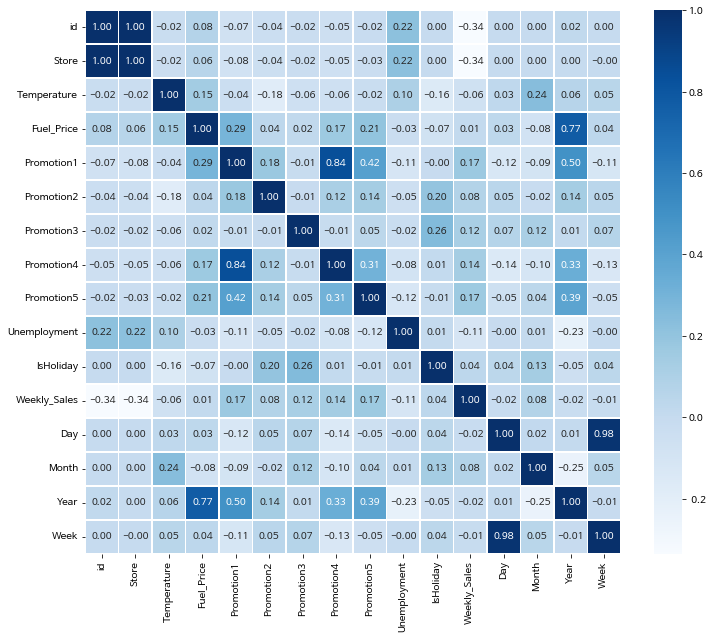

In [ ]:
import seaborn as sns 

plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

- week와는 상관관계가 없어보이므로 제거하자

In [ ]:
train = train.drop(columns=['Week'])

그런데 현재 데이터는 주간 데이터이다.
주간 데이터에서 일(Day)에 대한 데이터는 정보를 오염시킬 우려가 있어 Day 칼럼은 제거

또한 전처리를 완료한 Date 칼럼도 제거

In [ ]:
train = train.drop(columns=['Day', 'Date'])

train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012
6252,6253,45,67.87,3.948,11407.95,52.54,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    6255 non-null   float64
 5   Promotion2    6255 non-null   float64
 6   Promotion3    6255 non-null   float64
 7   Promotion4    6255 non-null   float64
 8   Promotion5    6255 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   bool   
 11  Weekly_Sales  6255 non-null   float64
 12  Month         6255 non-null   int64  
 13  Year          6255 non-null   int64  
dtypes: bool(1), float64(9), int64(4)
memory usage: 641.5 KB


In [ ]:
train[train['Year']==2010].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 6163
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2160 non-null   int64  
 1   Store         2160 non-null   int64  
 2   Temperature   2160 non-null   float64
 3   Fuel_Price    2160 non-null   float64
 4   Promotion1    2160 non-null   float64
 5   Promotion2    2160 non-null   float64
 6   Promotion3    2160 non-null   float64
 7   Promotion4    2160 non-null   float64
 8   Promotion5    2160 non-null   float64
 9   Unemployment  2160 non-null   float64
 10  IsHoliday     2160 non-null   bool   
 11  Weekly_Sales  2160 non-null   float64
 12  Month         2160 non-null   int64  
 13  Year          2160 non-null   int64  
dtypes: bool(1), float64(9), int64(4)
memory usage: 238.4 KB


In [ ]:
train[train['Year']==2011].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 48 to 6215
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2340 non-null   int64  
 1   Store         2340 non-null   int64  
 2   Temperature   2340 non-null   float64
 3   Fuel_Price    2340 non-null   float64
 4   Promotion1    2340 non-null   float64
 5   Promotion2    2340 non-null   float64
 6   Promotion3    2340 non-null   float64
 7   Promotion4    2340 non-null   float64
 8   Promotion5    2340 non-null   float64
 9   Unemployment  2340 non-null   float64
 10  IsHoliday     2340 non-null   bool   
 11  Weekly_Sales  2340 non-null   float64
 12  Month         2340 non-null   int64  
 13  Year          2340 non-null   int64  
dtypes: bool(1), float64(9), int64(4)
memory usage: 258.2 KB


In [ ]:
train[train['Year']==2012].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 100 to 6254
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1755 non-null   int64  
 1   Store         1755 non-null   int64  
 2   Temperature   1755 non-null   float64
 3   Fuel_Price    1755 non-null   float64
 4   Promotion1    1755 non-null   float64
 5   Promotion2    1755 non-null   float64
 6   Promotion3    1755 non-null   float64
 7   Promotion4    1755 non-null   float64
 8   Promotion5    1755 non-null   float64
 9   Unemployment  1755 non-null   float64
 10  IsHoliday     1755 non-null   bool   
 11  Weekly_Sales  1755 non-null   float64
 12  Month         1755 non-null   int64  
 13  Year          1755 non-null   int64  
dtypes: bool(1), float64(9), int64(4)
memory usage: 193.7 KB


- 2011년 어느날부터 프로모션 진행



### 로그함수 - 실패(값이 안좋았다)

로그변환을 해준다! 정규분포에 가까워지고, 프로모션 변수는 값이 극단적으로 큰경우가 나오기 때문에!

로그해줄때 음수는 좋지않으므로 음수를 모두 0으로 바꿔준다!

프로모션 스케일링하고 비슷한듯

In [ ]:
# train['Promotion1'][train['Promotion1']<0] =0
# train['Promotion2'][train['Promotion2']<0] = 0
# train['Promotion3'][train['Promotion3']<0] = 0
# train['Promotion4'][train['Promotion4']<0] = 0
# train['Promotion5'][train['Promotion5']<0] = 0

In [ ]:
# test['Promotion1'][test['Promotion1']<0] =0
# test['Promotion2'][test['Promotion2']<0] = 0
# test['Promotion3'][test['Promotion3']<0] = 0
# test['Promotion4'][test['Promotion4']<0] = 0
# test['Promotion5'][test['Promotion5']<0] = 0

In [ ]:
# train['Promotion1']=np.log1p(train['Promotion1'])
# train['Promotion2']=np.log1p(train['Promotion2'])
# train['Promotion3']=np.log1p(train['Promotion3'])
# train['Promotion4']=np.log1p(train['Promotion4'])
# train['Promotion5']=np.log1p(train['Promotion5'])

In [ ]:
# test['Promotion1']=np.log1p(test['Promotion1'])
# test['Promotion2']=np.log1p(test['Promotion2'])
# test['Promotion3']=np.log1p(test['Promotion3'])
# test['Promotion4']=np.log1p(test['Promotion4'])
# test['Promotion5']=np.log1p(test['Promotion5'])

In [ ]:
train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012
6252,6253,45,67.87,3.948,11407.95,52.54,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012


## 3. IsHoliday 전처리

파이썬에서는 True 는 1로, False는 0으로 해석하기 때문에 굳이 전처리를 해주지 않아도 되지만 그래도 해보았다.

In [ ]:
train.loc[train['IsHoliday'] == True, 'IsHoliday'] = 1
train.loc[train['IsHoliday'] == False, 'IsHoliday'] = 0

train['IsHoliday'] = train['IsHoliday'].astype('int')

In [ ]:
train.head()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year
0,1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90,2,2010
1,2,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44,2,2010
2,3,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17,2,2010
3,4,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,0,1409727.59,2,2010
4,5,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,0,1554806.68,3,2010


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    6255 non-null   float64
 5   Promotion2    6255 non-null   float64
 6   Promotion3    6255 non-null   float64
 7   Promotion4    6255 non-null   float64
 8   Promotion5    6255 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   int64  
 11  Weekly_Sales  6255 non-null   float64
 12  Month         6255 non-null   int64  
 13  Year          6255 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 684.3 KB


## 4. Promotion Scaling

Promotion은 모두 이상치를 가지고 있다.

또한 각 Promotion 별 수치의 범위가 크게 차이가 나기 때문에 Scaling 을 통해 수치의 범위를 비슷하게 조정

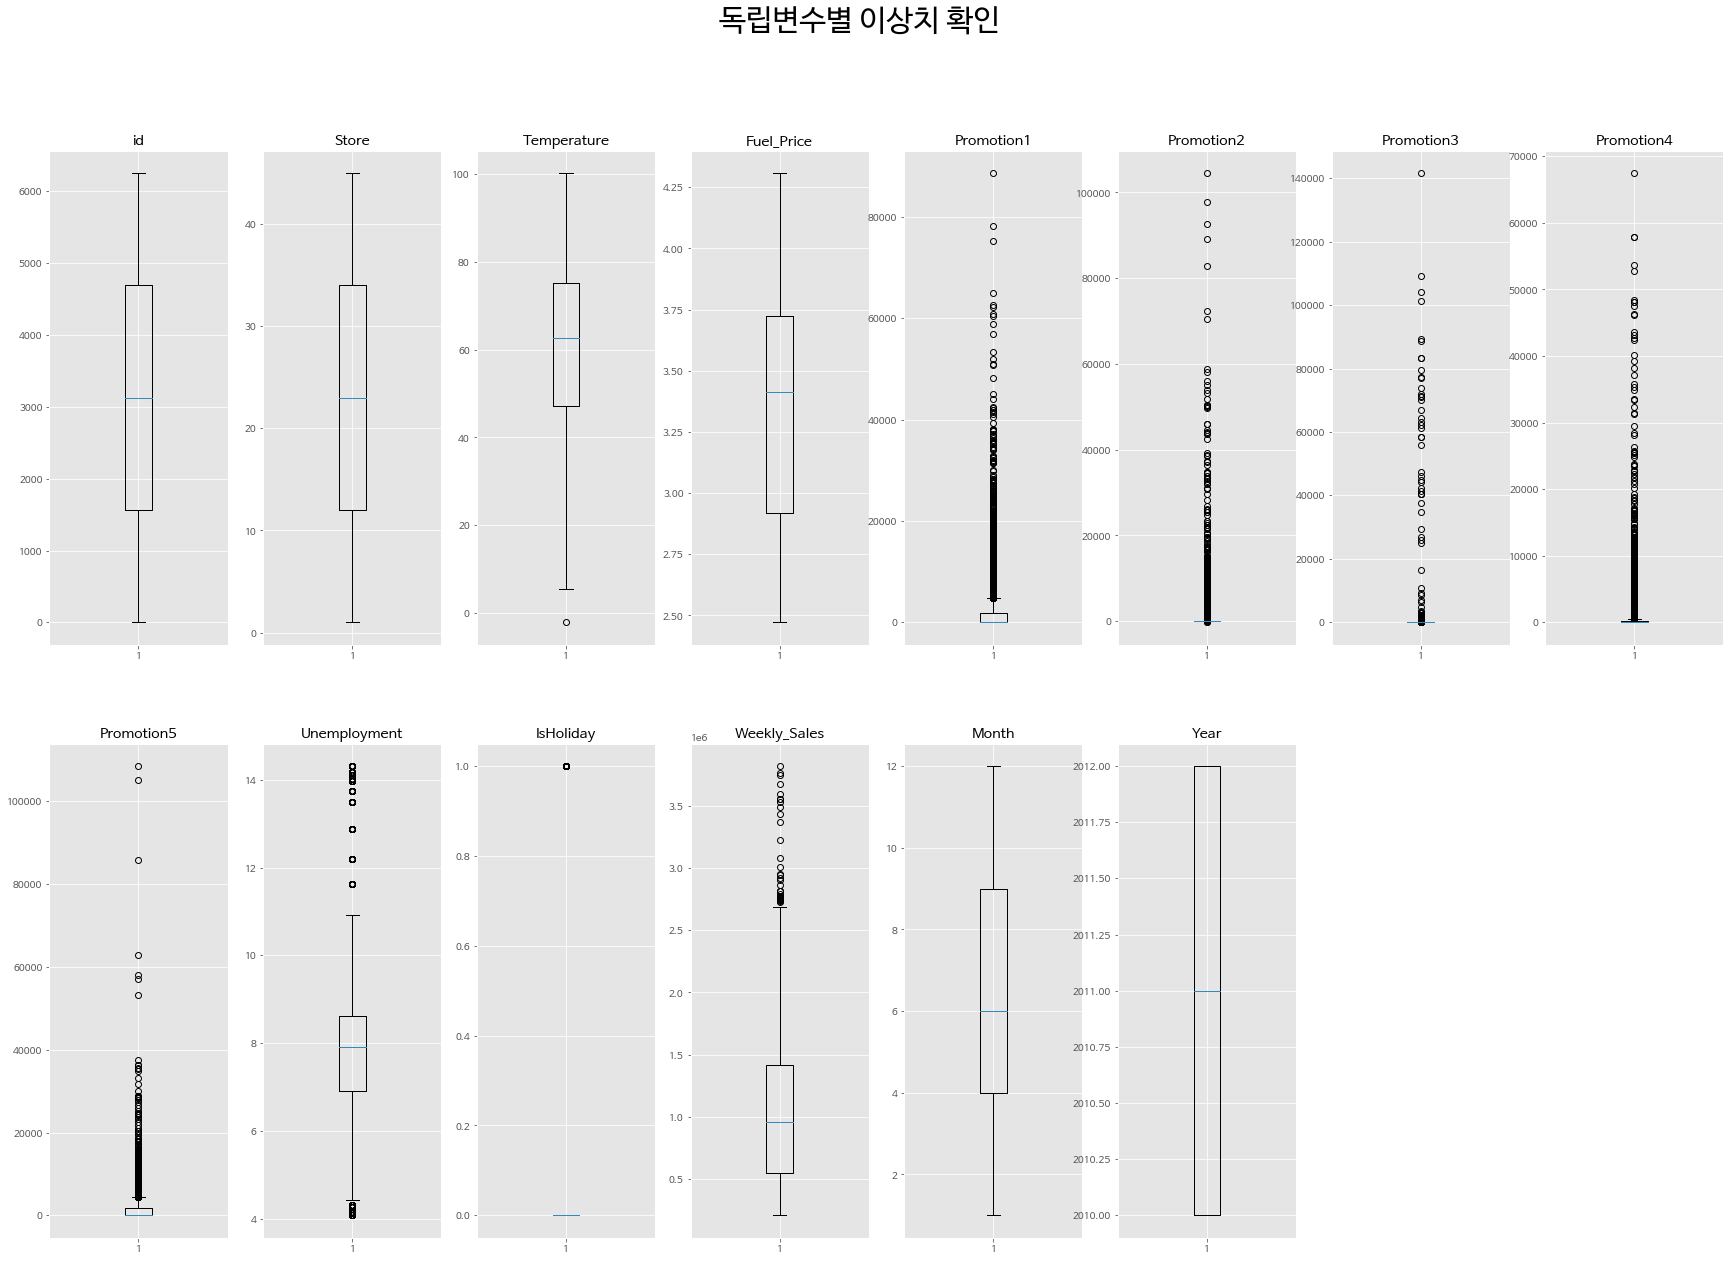

In [ ]:
plt.style.use('ggplot')

feature = train.describe().columns

plt.figure(figsize = (30,20))
plt.suptitle('독립변수별 이상치 확인',fontsize=30)

for i in range(len(feature)):
  plt.subplot(2,8,i+1)
  plt.title(feature[i])
  plt.boxplot(train[feature[i]])

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train[['Promotion1','Promotion2', 'Promotion3',	'Promotion4',	'Promotion5']])

scaled = scaler.transform(train[['Promotion1','Promotion2', 'Promotion3',	'Promotion4',	'Promotion5']])

train[['Scaled_Promotion1','Scaled_Promotion2','Scaled_Promotion3',
       'Scaled_Promotion4','Scaled_Promotion5']] = scaled

train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,0,1643690.90,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,1,1641957.44,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,0,1611968.17,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,0,1409727.59,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,0,1554806.68,3,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,0,734297.87,8,2012,3.580831,-0.169101,-0.065038,1.574261,0.598779
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,1,766512.66,9,2012,1.453422,-0.167727,-0.072574,0.222921,0.128229
6252,6253,45,67.87,3.948,11407.95,52.54,4.30,3421.72,5268.92,8.684,0,702238.27,9,2012,1.518086,-0.159693,-0.081611,0.635401,0.909037
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,0,723086.20,9,2012,1.019698,-0.151659,-0.070590,0.360229,1.735591


In [ ]:
train = train.drop(columns = ['Promotion1','Promotion2', 'Promotion3',	'Promotion4',	'Promotion5'])

train

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,8.106,0,1643690.90,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
1,2,1,38.51,2.548,8.106,1,1641957.44,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
2,3,1,39.93,2.514,8.106,0,1611968.17,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
3,4,1,46.63,2.561,8.106,0,1409727.59,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
4,5,1,46.50,2.625,8.106,0,1554806.68,3,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,8.684,0,734297.87,8,2012,3.580831,-0.169101,-0.065038,1.574261,0.598779
6251,6252,45,75.70,3.911,8.684,1,766512.66,9,2012,1.453422,-0.167727,-0.072574,0.222921,0.128229
6252,6253,45,67.87,3.948,8.684,0,702238.27,9,2012,1.518086,-0.159693,-0.081611,0.635401,0.909037
6253,6254,45,65.32,4.038,8.684,0,723086.20,9,2012,1.019698,-0.151659,-0.070590,0.360229,1.735591


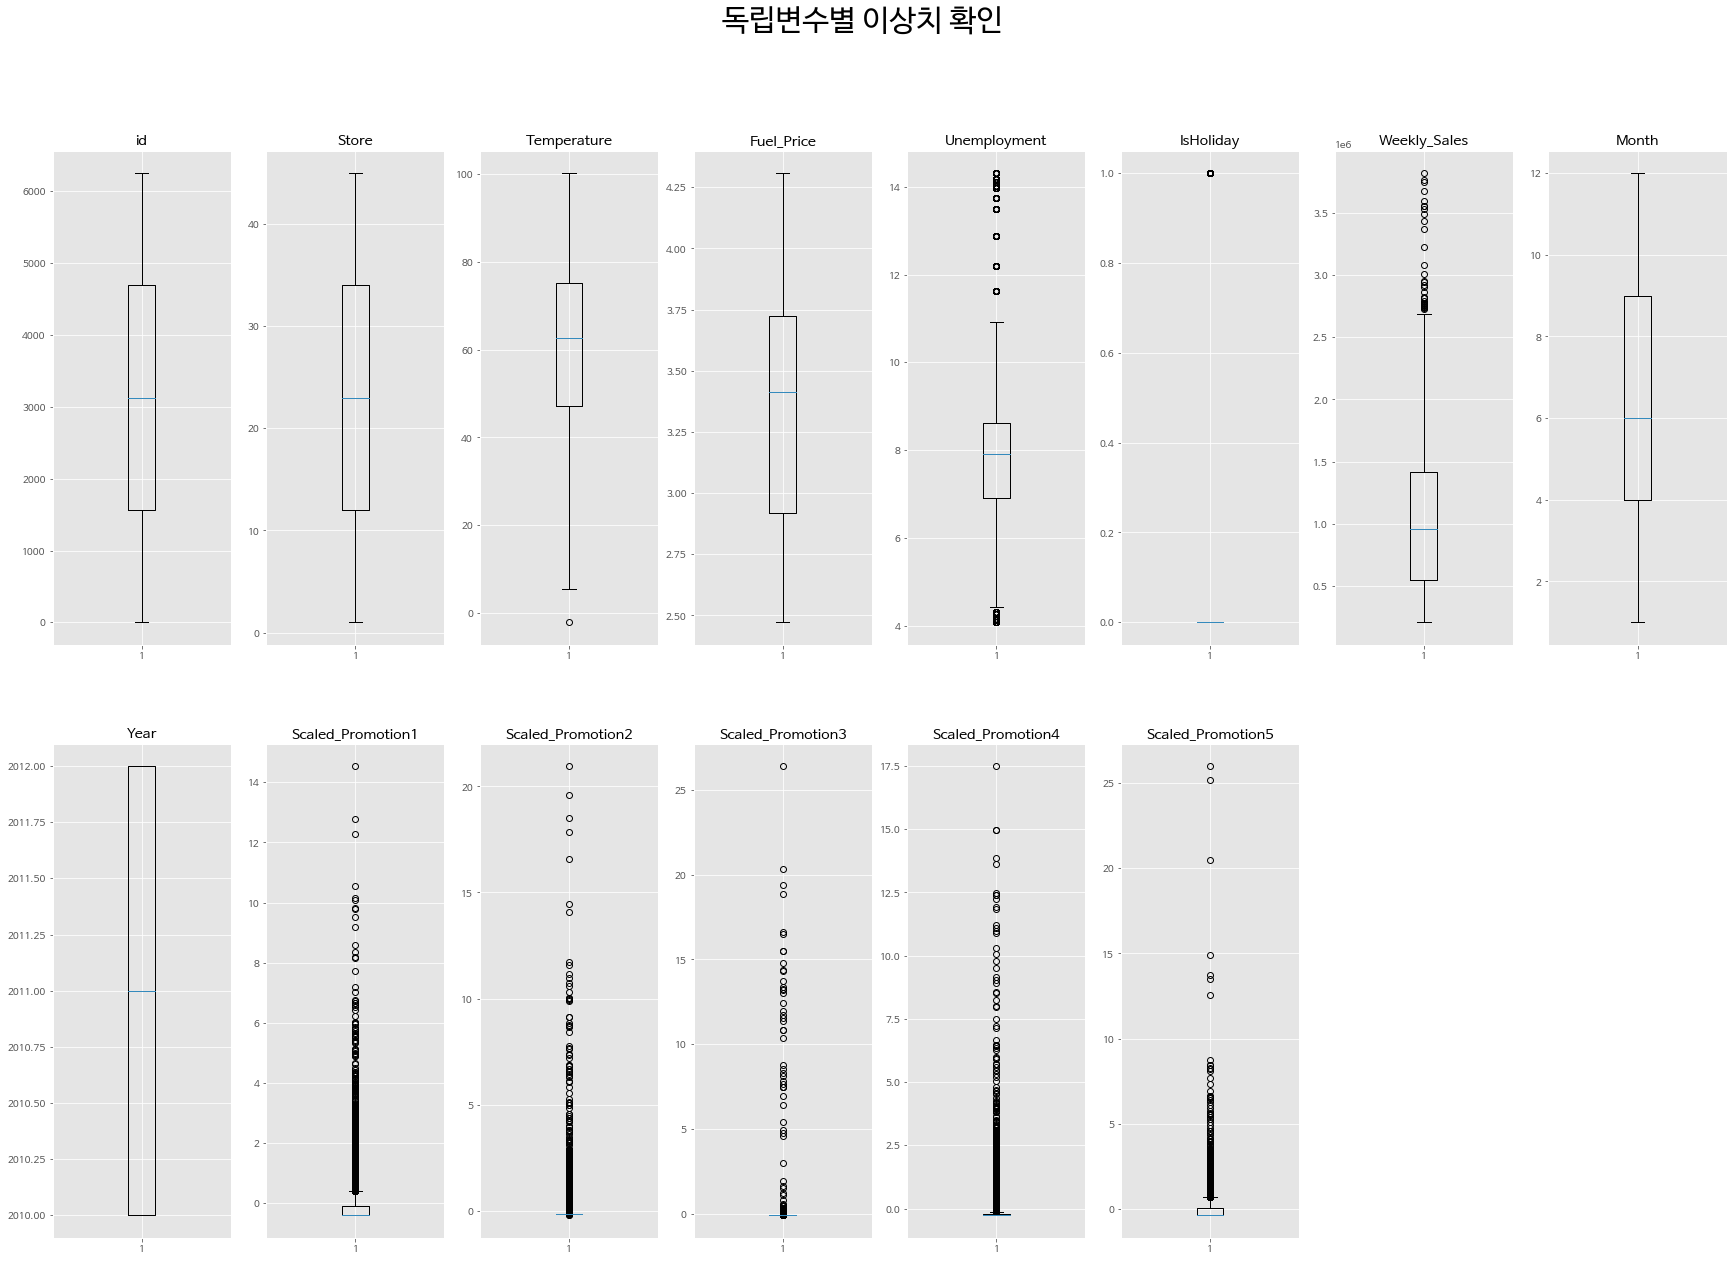

In [ ]:
plt.style.use('ggplot')

feature = train.describe().columns

plt.figure(figsize = (30,20))
plt.suptitle('독립변수별 이상치 확인',fontsize=30)

for i in range(len(feature)):
  plt.subplot(2,8,i+1)
  plt.title(feature[i])
  plt.boxplot(train[feature[i]])

plt.show()

In [ ]:
train

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,8.106,0,1643690.90,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
1,2,1,38.51,2.548,8.106,1,1641957.44,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
2,3,1,39.93,2.514,8.106,0,1611968.17,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
3,4,1,46.63,2.561,8.106,0,1409727.59,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
4,5,1,46.50,2.625,8.106,0,1554806.68,3,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,8.684,0,734297.87,8,2012,3.580831,-0.169101,-0.065038,1.574261,0.598779
6251,6252,45,75.70,3.911,8.684,1,766512.66,9,2012,1.453422,-0.167727,-0.072574,0.222921,0.128229
6252,6253,45,67.87,3.948,8.684,0,702238.27,9,2012,1.518086,-0.159693,-0.081611,0.635401,0.909037
6253,6254,45,65.32,4.038,8.684,0,723086.20,9,2012,1.019698,-0.151659,-0.070590,0.360229,1.735591


In [ ]:
train.loc[train['Store']==45]

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
6116,6117,45,27.31,2.784,8.992,0,890689.51,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
6117,6118,45,27.73,2.773,8.992,1,656988.64,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
6118,6119,45,31.27,2.745,8.992,0,841264.04,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
6119,6120,45,34.89,2.754,8.992,0,741891.65,2,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
6120,6121,45,37.13,2.777,8.992,0,777951.22,3,2010,-0.405482,-0.170314,-0.082415,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,8.684,0,734297.87,8,2012,3.580831,-0.169101,-0.065038,1.574261,0.598779
6251,6252,45,75.70,3.911,8.684,1,766512.66,9,2012,1.453422,-0.167727,-0.072574,0.222921,0.128229
6252,6253,45,67.87,3.948,8.684,0,702238.27,9,2012,1.518086,-0.159693,-0.081611,0.635401,0.909037
6253,6254,45,65.32,4.038,8.684,0,723086.20,9,2012,1.019698,-0.151659,-0.070590,0.360229,1.735591


## 변수 관찰

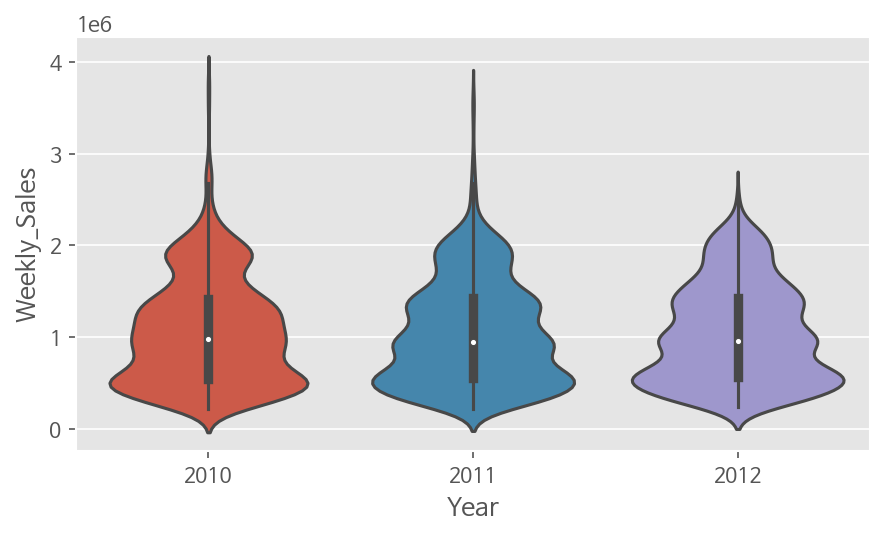

In [ ]:
def discrete_plot(variable):
  plt.figure(dpi=150)
  sns.violinplot(x=train[variable],y=train['Weekly_Sales'])
  plt.tight_layout(rect=[0,0.03,1,0.95])
  plt.show()

discrete_plot('Year')

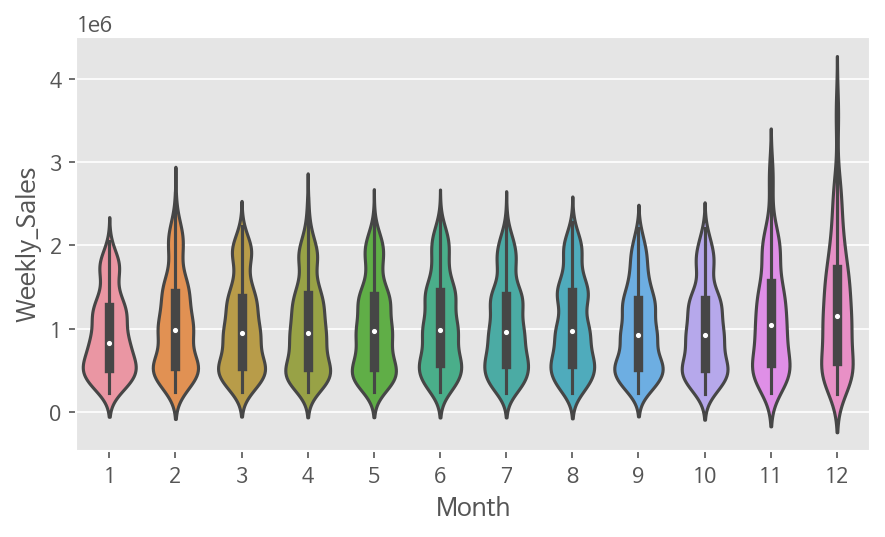

In [ ]:
discrete_plot('Month')

12월 매출이 제일 크다

# 나만의 분석

2010년 2월~ 2012년 9월

내가 예측해야하는거 2012년 10월~

즉, Feature Engineering 해야한다. 

가설1: 지점별 매출액에 차이가 있을 것이다.

가설2: 온도에 따라 매출액 차이가 있을것이다. 외출 시렁

가설3: 연료가격에따라 차이....? 운전비쌍

가설4: 실업률이 영향 돈없엉

가설5: 쉬는날에 더 쇼핑 많을 것이다.

가설6: 달과 연도에도 차이가?!

프로모션 행사 할때랑 안할때 차이...

### 지점 분석



In [ ]:
train['Store'].value_counts()

1     139
24    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
25    139
23    139
2     139
22    139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
45    139
Name: Store, dtype: int64

- groupby

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
train.groupby('Store')['Weekly_Sales'].mean().sort_values()

Store
33    259675.19741
44    301676.74410
5     317801.34014
36    376079.07050
38    384300.21518
3     402175.73561
30    438550.92532
37    518331.65230
16    519686.02460
29    539966.22007
9     543397.53914
42    556144.22259
7     572496.49309
15    625138.55597
43    633754.87784
25    707121.23914
21    758967.59396
45    787402.98583
17    892149.85029
8     908311.16496
35    921485.91561
40    963879.42094
34    966990.99885
26   1002460.80590
12   1010337.00525
22   1028699.78942
18   1084692.28360
32   1165615.23928
41   1265392.00820
28   1325450.48741
24   1356981.31252
11   1358239.02748
23   1389658.02626
31   1396622.04338
39   1447695.88777
19   1447703.71360
1    1555087.92489
6    1567699.60978
27   1778997.09878
10   1904069.56496
2    1926625.36727
13   2003046.80439
14   2031497.13115
4    2093195.90338
20   2107607.30338
Name: Weekly_Sales, dtype: float64

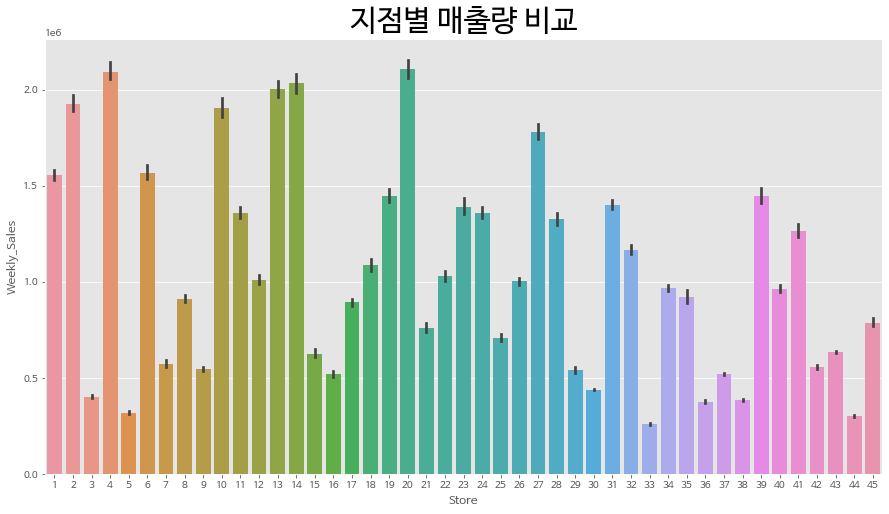

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['Store'], y=train['Weekly_Sales'])
plt.title('지점별 매출량 비교', fontsize = 30)
plt.show()

### 홀리데이

쉬는날 매출량과 비교했을 때 차이가 거의 없다.

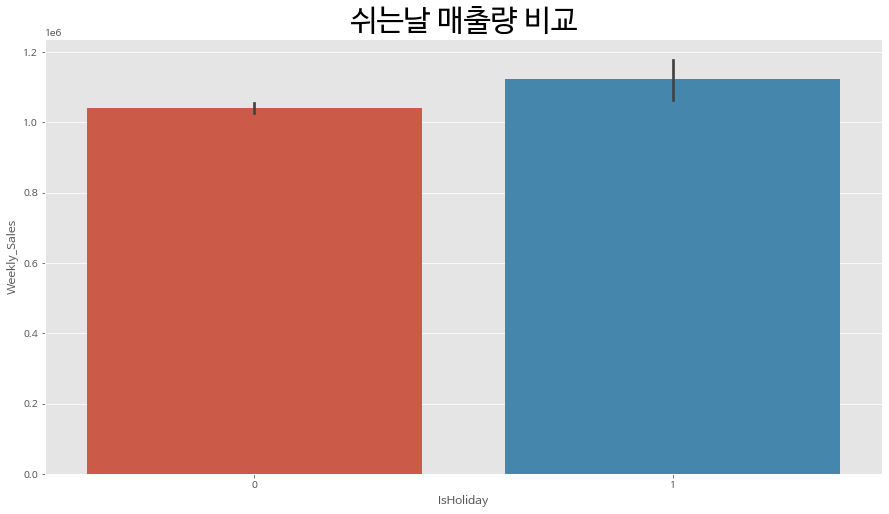

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['IsHoliday'], y=train['Weekly_Sales'])
plt.title('쉬는날 매출량 비교', fontsize = 30)
plt.show()

In [ ]:
train.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
0   1041784.28168
1   1122887.89236
Name: Weekly_Sales, dtype: float64

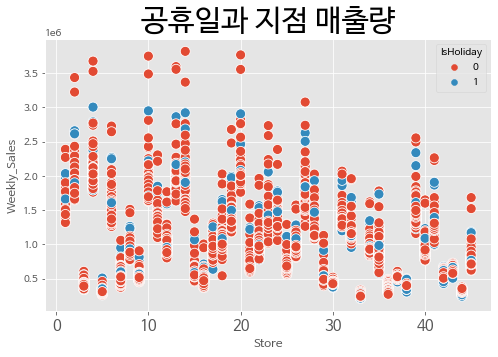

In [ ]:
from seaborn.relational import scatterplot

plt.figure(figsize=(8,5))
sns.scatterplot(x=train['Store'], y=train['Weekly_Sales'], hue=train['IsHoliday'], s = 100 )
plt.xticks(fontsize=15)
plt.title('공휴일과 지점 매출량', fontsize = 30)
plt.show()

### 온도

큰 관련이 없어보인다.



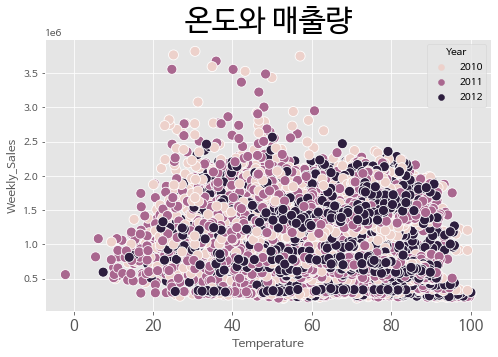

In [ ]:
from seaborn.relational import scatterplot

plt.figure(figsize=(8,5))
sns.scatterplot(x=train['Temperature'], y=train['Weekly_Sales'], hue=train['Year'], s = 100 )
plt.xticks(fontsize=15)
plt.title('온도와 매출량', fontsize = 30)
plt.show()

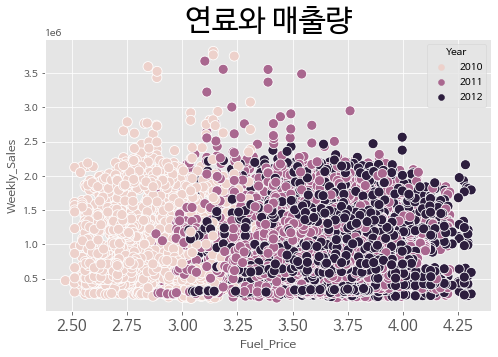

In [ ]:
from seaborn.relational import scatterplot

plt.figure(figsize=(8,5))
sns.scatterplot(x=train['Fuel_Price'], y=train['Weekly_Sales'], hue=train['Year'], s = 100 )
plt.xticks(fontsize=15)
plt.title('연료와 매출량', fontsize = 30)
plt.show()

#### 홀리데이,연료, 온도 제거가능

In [ ]:
train.head()

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31000,2.57200,8.10600,0,1643690.90000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130
1,2,1,38.51000,2.54800,8.10600,1,1641957.44000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130
2,3,1,39.93000,2.51400,8.10600,0,1611968.17000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130
3,4,1,46.63000,2.56100,8.10600,0,1409727.59000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130
4,5,1,46.50000,2.62500,8.10600,0,1554806.68000,3,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130


### 프로모션 추가

In [ ]:
train['Promotion']=train['Scaled_Promotion1']+train['Scaled_Promotion2']+train['Scaled_Promotion3']+train['Scaled_Promotion4']+train['Scaled_Promotion5']
train['Promotion']

0      -1.29484
1      -1.29484
2      -1.29484
3      -1.29484
4      -1.29484
         ...   
6250    5.51973
6251    1.56427
6252    2.82122
6253    2.89327
6254    0.69842
Name: Promotion, Length: 6255, dtype: float64

In [ ]:
train.groupby('Month')['Promotion'].mean()

Month
1     0.35073
2     1.47957
3    -0.07313
4    -0.61705
5    -0.39456
6    -0.28374
7    -0.43929
8     0.24048
9    -0.45666
10   -1.29484
11    1.08761
12    0.93651
Name: Promotion, dtype: float64

In [ ]:
train.groupby('Year')['Promotion'].mean()

Year
2010   -1.29484
2011   -0.49920
2012    2.25925
Name: Promotion, dtype: float64

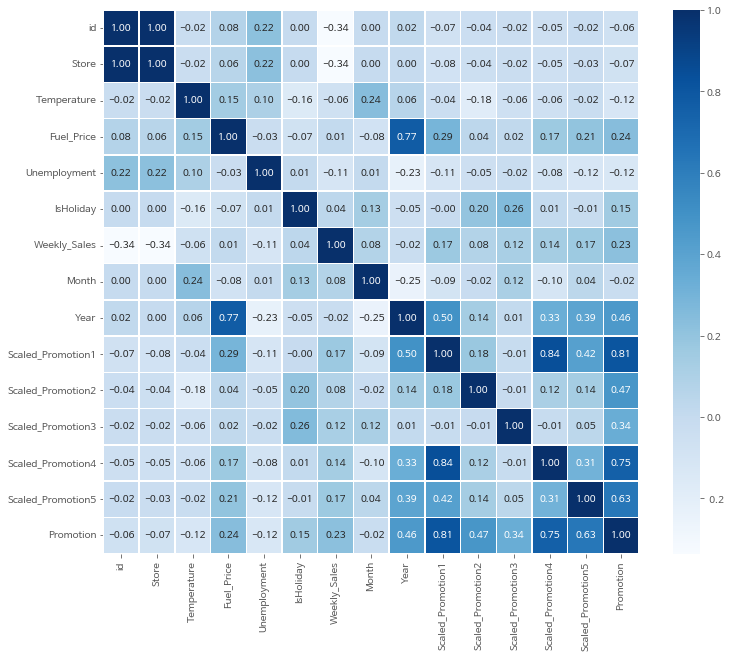

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

## test set 적용

### 결측치처리

In [ ]:
test.isna().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

In [ ]:
test.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55000,3.61700,8077.89000,NaN,18.22000,3617.43000,3626.14000,6.57300,False
1,2,1,12/10/2012,62.99000,3.60100,2086.18000,NaN,8.11000,602.36000,5926.45000,6.57300,False
2,3,1,19/10/2012,67.97000,3.59400,950.33000,NaN,4.93000,80.25000,2312.85000,6.57300,False
3,4,1,26/10/2012,69.16000,3.50600,2585.85000,31.75000,6.00000,1057.16000,1305.01000,6.57300,False
4,5,2,05/10/2012,70.27000,3.61700,6037.76000,NaN,10.04000,3027.37000,3853.40000,6.17000,False


In [ ]:
test = test.interpolate(method='values')

In [ ]:
test.head(10)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55000,3.61700,8077.89000,NaN,18.22000,3617.43000,3626.14000,6.57300,False
1,2,1,12/10/2012,62.99000,3.60100,2086.18000,NaN,8.11000,602.36000,5926.45000,6.57300,False
2,3,1,19/10/2012,67.97000,3.59400,950.33000,NaN,4.93000,80.25000,2312.85000,6.57300,False
3,4,1,26/10/2012,69.16000,3.50600,2585.85000,31.75000,6.00000,1057.16000,1305.01000,6.57300,False
4,5,2,05/10/2012,70.27000,3.61700,6037.76000,56.25500,10.04000,3027.37000,3853.40000,6.17000,False
5,6,2,12/10/2012,60.97000,3.60100,2145.50000,80.76000,33.31000,586.83000,10421.01000,6.17000,False
6,7,2,19/10/2012,68.08000,3.59400,4461.89000,105.26500,1.14000,1579.67000,2642.29000,6.17000,False
7,8,2,26/10/2012,69.79000,3.50600,6152.59000,129.77000,200.00000,272.29000,2924.15000,6.17000,False
8,9,3,05/10/2012,72.74000,3.61700,1750.80000,98.91500,3.01000,480.24000,646.82000,6.03400,False
9,10,3,12/10/2012,70.31000,3.60100,775.31000,68.06000,2.78000,498.54000,328.16000,6.03400,False


In [ ]:
test.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      3
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

- 나머지는 뒤에껄로 채워주기

In [ ]:
test = test.fillna(method = 'bfill')

In [ ]:

# Date 전처리
test['Month'] = test['Date'].apply(lambda x: date_encoder(x)[1])
test['Year'] = test['Date'].apply(lambda x: date_encoder(x)[2])
test=test.drop(columns = ['Date'])

# Promotion Scaling
scaled = scaler.transform(test[['Promotion1','Promotion2', 'Promotion3',	'Promotion4',	'Promotion5']])

test[['Scaled_Promotion1','Scaled_Promotion2','Scaled_Promotion3',
       'Scaled_Promotion4','Scaled_Promotion5']] = scaled

test = test.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

# IsHoliday

test.loc[test['IsHoliday'] == True, 'IsHoliday'] = 1
test.loc[test['IsHoliday'] == False, 'IsHoliday'] = 0

test['IsHoliday'] = test['IsHoliday'].astype('int')

# 프로모션
test['Promotion']=test['Scaled_Promotion1']+test['Scaled_Promotion2']+test['Scaled_Promotion3']+test['Scaled_Promotion4']+test['Scaled_Promotion5']
test['Promotion']


test

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,Promotion
0,1,1,68.55000,3.61700,6.57300,0,10,2012,0.95658,-0.16390,-0.07901,0.68692,0.50984,1.91044
1,2,1,62.99000,3.60100,6.57300,0,10,2012,-0.05372,-0.16390,-0.08090,-0.10676,1.06882,0.66354
2,3,1,67.97000,3.59400,6.57300,0,10,2012,-0.24524,-0.16390,-0.08149,-0.24420,0.19072,-0.54411
3,4,1,69.16000,3.50600,6.57300,0,10,2012,0.03053,-0.16390,-0.08129,0.01296,-0.05419,-0.25588
4,5,2,70.27000,3.61700,6.17000,0,10,2012,0.61258,-0.15894,-0.08054,0.53159,0.56507,1.46977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,46.97000,3.75500,5.21700,0,10,2012,-0.39896,-0.16979,-0.08223,0.27866,-0.26007,-0.63239
176,177,45,64.89000,3.98500,8.66700,0,10,2012,0.44548,-0.16698,-0.07890,0.32786,0.19732,0.72478
177,178,45,54.47000,4.00000,8.66700,0,10,2012,-0.07562,-0.16418,-0.08094,-0.10756,0.59839,0.17009
178,179,45,56.47000,3.96900,8.66700,0,10,2012,-0.06757,-0.16138,-0.08182,-0.15010,0.00230,-0.45856


In [ ]:
train.columns

Index(['id', 'Store', 'Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday',
       'Weekly_Sales', 'Month', 'Year', 'Scaled_Promotion1',
       'Scaled_Promotion2', 'Scaled_Promotion3', 'Scaled_Promotion4',
       'Scaled_Promotion5', 'Promotion'],
      dtype='object')

# 원-핫 인코딩

관계가 독립적임을 표현해주는 것

In [ ]:
pd.get_dummies(train['Store'])

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train=pd.get_dummies(train,columns=['Store'])
test=pd.get_dummies(test,columns=['Store'])
print(train.shape)
print(test.shape)
train.head()

(6255, 59)
(180, 58)


,id,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,42.31000,2.57200,8.10600,0,1643690.90000,2,2010,-0.40548,-0.17031,...,0,0,0,0,0,0,0,0,0,0
1,2,38.51000,2.54800,8.10600,1,1641957.44000,2,2010,-0.40548,-0.17031,...,0,0,0,0,0,0,0,0,0,0
2,3,39.93000,2.51400,8.10600,0,1611968.17000,2,2010,-0.40548,-0.17031,...,0,0,0,0,0,0,0,0,0,0
3,4,46.63000,2.56100,8.10600,0,1409727.59000,2,2010,-0.40548,-0.17031,...,0,0,0,0,0,0,0,0,0,0
4,5,46.50000,2.62500,8.10600,0,1554806.68000,3,2010,-0.40548,-0.17031,...,0,0,0,0,0,0,0,0,0,0


Weekly_Sales 변수를 로그로 바꾸자

In [ ]:
np.log1p(train['Weekly_Sales']) #근데...사용가능?

0      14.31246
1      14.31140
2      14.29297
3      14.15891
4      14.25686
         ...   
6250   13.50667
6251   13.54961
6252   13.46203
6253   13.49129
6254   13.47748
Name: Weekly_Sales, Length: 6255, dtype: float64

# Modeling

## 1. 모델 선택 RMSE

RMSE가 높을수록 나쁘고 높은 점수가 아닌 낮은 오류 점수이다.

In [ ]:
# 분석할 의미가 없는 칼럼을 제거합니다. 'Fuel_Price','Temperature',
train = train.drop(columns=['id','Fuel_Price','Temperature','IsHoliday'])
test = test.drop(columns=['id','Fuel_Price','Temperature','IsHoliday'])

In [ ]:
train

,Unemployment,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,Promotion,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,8.10600,1643690.90000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,...,0,0,0,0,0,0,0,0,0,0
1,8.10600,1641957.44000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,...,0,0,0,0,0,0,0,0,0,0
2,8.10600,1611968.17000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,...,0,0,0,0,0,0,0,0,0,0
3,8.10600,1409727.59000,2,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,...,0,0,0,0,0,0,0,0,0,0
4,8.10600,1554806.68000,3,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,8.68400,734297.87000,8,2012,3.58083,-0.16910,-0.06504,1.57426,0.59878,5.51973,...,0,0,0,0,0,0,0,0,0,1
6251,8.68400,766512.66000,9,2012,1.45342,-0.16773,-0.07257,0.22292,0.12823,1.56427,...,0,0,0,0,0,0,0,0,0,1
6252,8.68400,702238.27000,9,2012,1.51809,-0.15969,-0.08161,0.63540,0.90904,2.82122,...,0,0,0,0,0,0,0,0,0,1
6253,8.68400,723086.20000,9,2012,1.01970,-0.15166,-0.07059,0.36023,1.73559,2.89327,...,0,0,0,0,0,0,0,0,0,1


# validation셋 구축

In [ ]:
from sklearn.model_selection import train_test_split


# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
X= train.drop(columns=['Weekly_Sales'])
y= train['Weekly_Sales']


X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True)

In [ ]:
y_train.head()

7      1404429.92000
4984    324801.13000
5847    693058.34000
3531    945643.17000
6198    726482.39000
Name: Weekly_Sales, dtype: float64

In [ ]:
X_valid.head()

,Unemployment,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,Promotion,Store_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
3947,10.25600,2,2011,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,0,...,0,0,0,0,0,0,0,0,0,0
2765,7.13900,6,2012,1.64721,0.00671,-0.08197,0.83896,1.45522,3.86613,0,...,0,0,0,0,0,0,0,0,0,0
6048,6.90600,6,2011,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,0,...,0,0,0,0,0,0,0,0,1,0
5178,14.31300,10,2010,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,0,...,0,0,1,0,0,0,0,0,0,0
1203,6.05400,11,2011,-0.40548,-0.17031,-0.08242,-0.26532,-0.37130,-1.29484,0,...,0,0,0,0,0,0,0,0,0,0


### XGBoost 

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 1000, tree_method='gpu_hist')

model.fit(X_train,y_train, eval_set=[(X_valid,y_valid)],
          eval_metric = 'rmse',
          early_stopping_rounds=10,
          verbose=5
          )

y_pred = model.predict(X_valid)


[0]	validation_0-rmse:1.09596e+06
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:754993
[10]	validation_0-rmse:576251
[15]	validation_0-rmse:485921
[20]	validation_0-rmse:436406
[25]	validation_0-rmse:406313
[30]	validation_0-rmse:386422
[35]	validation_0-rmse:368535
[40]	validation_0-rmse:353250
[45]	validation_0-rmse:338859
[50]	validation_0-rmse:325711
[55]	validation_0-rmse:312547
[60]	validation_0-rmse:301047
[65]	validation_0-rmse:291156
[70]	validation_0-rmse:282000
[75]	validation_0-rmse:272228
[80]	validation_0-rmse:263562
[85]	validation_0-rmse:254951
[90]	validation_0-rmse:247326
[95]	validation_0-rmse:240395
[100]	validation_0-rmse:232986
[105]	validation_0-rmse:227130
[110]	validation_0-rmse:221689
[115]	validation_0-rmse:215564
[120]	validation_0-rmse:210746
[125]	validation_0-rmse:205895
[130]	validation_0-rmse:201004
[135]	validation_0-rmse:197466
[140]	validation_0-rmse:192988
[145]	validation_0-rmse:189329
[150]	validation_0-rms

- RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):
  return mean_squared_error(pred, real)**0.5

In [ ]:
def make_plot():
  RMSE = rmse(y_pred, y_valid)

  plt.figure(dpi=150)

  plt.title('RMSE : ' + str(RMSE)[:8])

  plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
  plt.plot(y_pred, alpha=0.6, label='pred')

  plt.legend()
  plt.show()

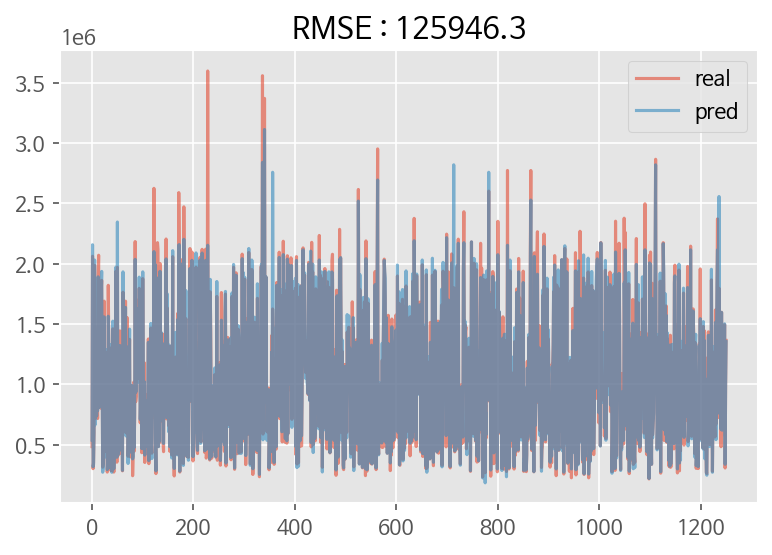

In [ ]:
make_plot()

## K-fold validation
모든 데이터를 다 한번씩 validation셋으로 활용

[0]	validation_0-rmse:1.07581e+06
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:734185
[10]	validation_0-rmse:556545
[15]	validation_0-rmse:467022
[20]	validation_0-rmse:419234
[25]	validation_0-rmse:389214
[30]	validation_0-rmse:367889
[35]	validation_0-rmse:350675
[40]	validation_0-rmse:336075
[45]	validation_0-rmse:323183
[50]	validation_0-rmse:310473
[55]	validation_0-rmse:298743
[60]	validation_0-rmse:288504
[65]	validation_0-rmse:278025
[70]	validation_0-rmse:268773
[75]	validation_0-rmse:260288
[80]	validation_0-rmse:251325
[85]	validation_0-rmse:243472
[90]	validation_0-rmse:235687
[95]	validation_0-rmse:228349
[100]	validation_0-rmse:222333
[105]	validation_0-rmse:216307
[110]	validation_0-rmse:210499
[115]	validation_0-rmse:205058
[120]	validation_0-rmse:199536
[125]	validation_0-rmse:194681
[130]	validation_0-rmse:190060
[135]	validation_0-rmse:185841
[140]	validation_0-rmse:181979
[145]	validation_0-rmse:178195
[150]	validation_0-rms

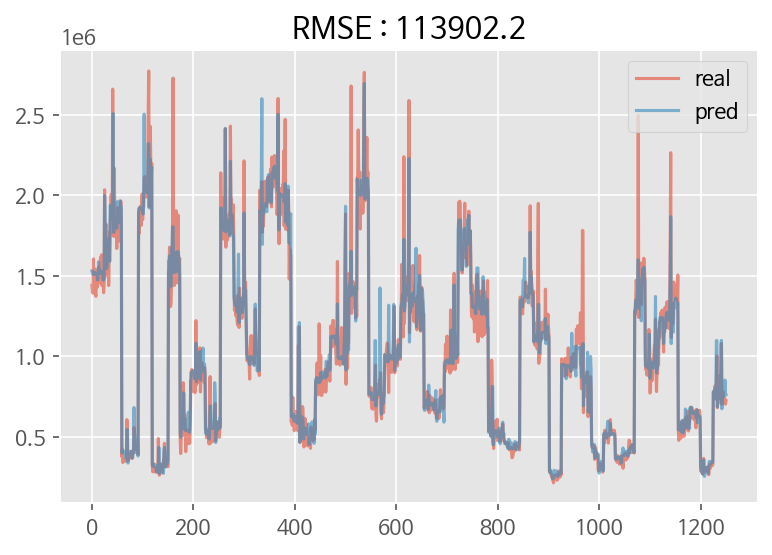

[0]	validation_0-rmse:1.10955e+06
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:769737
[10]	validation_0-rmse:588356
[15]	validation_0-rmse:495302
[20]	validation_0-rmse:444497
[25]	validation_0-rmse:413141
[30]	validation_0-rmse:390125
[35]	validation_0-rmse:372892
[40]	validation_0-rmse:357324
[45]	validation_0-rmse:344088
[50]	validation_0-rmse:331094
[55]	validation_0-rmse:318989
[60]	validation_0-rmse:308185
[65]	validation_0-rmse:296331
[70]	validation_0-rmse:287269
[75]	validation_0-rmse:277854
[80]	validation_0-rmse:269868
[85]	validation_0-rmse:261472
[90]	validation_0-rmse:254425
[95]	validation_0-rmse:246928
[100]	validation_0-rmse:240629
[105]	validation_0-rmse:235150
[110]	validation_0-rmse:228586
[115]	validation_0-rmse:223598
[120]	validation_0-rmse:218276
[125]	validation_0-rmse:213145
[130]	validation_0-rmse:209252
[135]	validation_0-rmse:204272
[140]	validation_0-rmse:200892
[145]	validation_0-rmse:197350
[150]	validation_0-rms

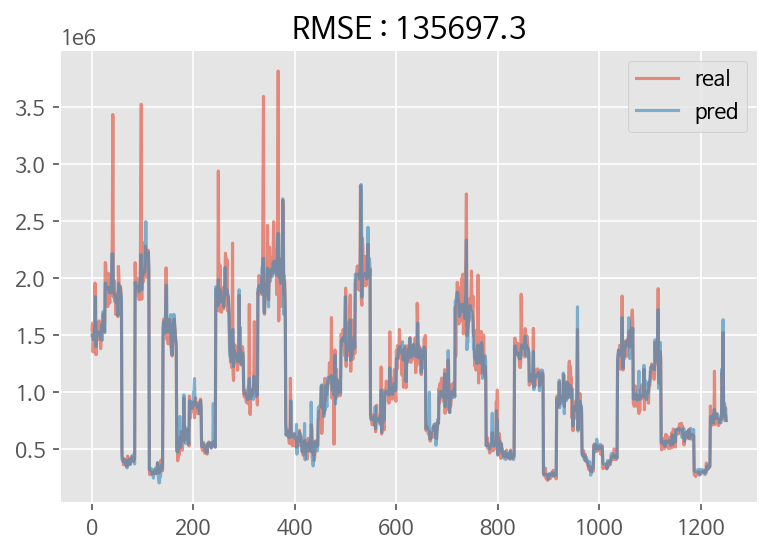

[0]	validation_0-rmse:1.09558e+06
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:756522
[10]	validation_0-rmse:575817
[15]	validation_0-rmse:483592
[20]	validation_0-rmse:434516
[25]	validation_0-rmse:404892
[30]	validation_0-rmse:383569
[35]	validation_0-rmse:365221
[40]	validation_0-rmse:349505
[45]	validation_0-rmse:335033
[50]	validation_0-rmse:320668
[55]	validation_0-rmse:308294
[60]	validation_0-rmse:295682
[65]	validation_0-rmse:285023
[70]	validation_0-rmse:274620
[75]	validation_0-rmse:265457
[80]	validation_0-rmse:256493
[85]	validation_0-rmse:248208
[90]	validation_0-rmse:240146
[95]	validation_0-rmse:233023
[100]	validation_0-rmse:225675
[105]	validation_0-rmse:219600
[110]	validation_0-rmse:213895
[115]	validation_0-rmse:208025
[120]	validation_0-rmse:202651
[125]	validation_0-rmse:197027
[130]	validation_0-rmse:191641
[135]	validation_0-rmse:187357
[140]	validation_0-rmse:183272
[145]	validation_0-rmse:179245
[150]	validation_0-rms

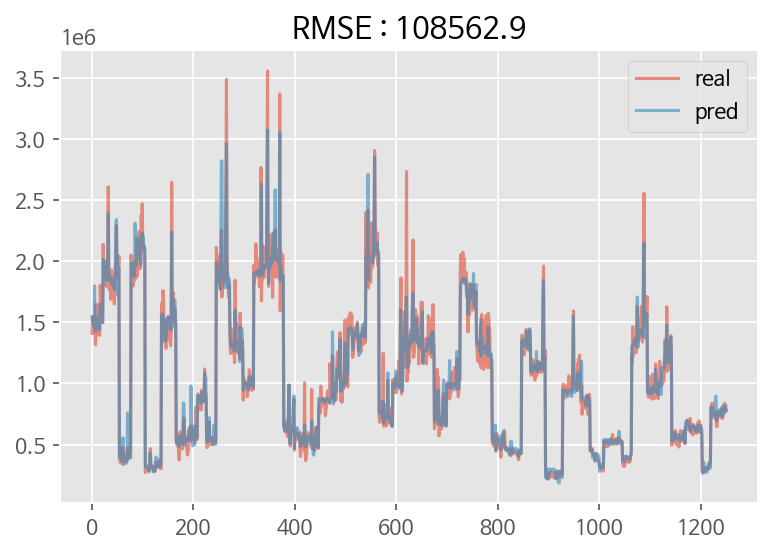

[0]	validation_0-rmse:1.10029e+06
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:759010
[10]	validation_0-rmse:581607
[15]	validation_0-rmse:490293
[20]	validation_0-rmse:441883
[25]	validation_0-rmse:411660
[30]	validation_0-rmse:391106
[35]	validation_0-rmse:373031
[40]	validation_0-rmse:358103
[45]	validation_0-rmse:344343
[50]	validation_0-rmse:331858
[55]	validation_0-rmse:319855
[60]	validation_0-rmse:308964
[65]	validation_0-rmse:298608
[70]	validation_0-rmse:288999
[75]	validation_0-rmse:279514
[80]	validation_0-rmse:271206
[85]	validation_0-rmse:263500
[90]	validation_0-rmse:256406
[95]	validation_0-rmse:248625
[100]	validation_0-rmse:242201
[105]	validation_0-rmse:236361
[110]	validation_0-rmse:231090
[115]	validation_0-rmse:225874
[120]	validation_0-rmse:220202
[125]	validation_0-rmse:216279
[130]	validation_0-rmse:212118
[135]	validation_0-rmse:207945
[140]	validation_0-rmse:204407
[145]	validation_0-rmse:200556
[150]	validation_0-rms

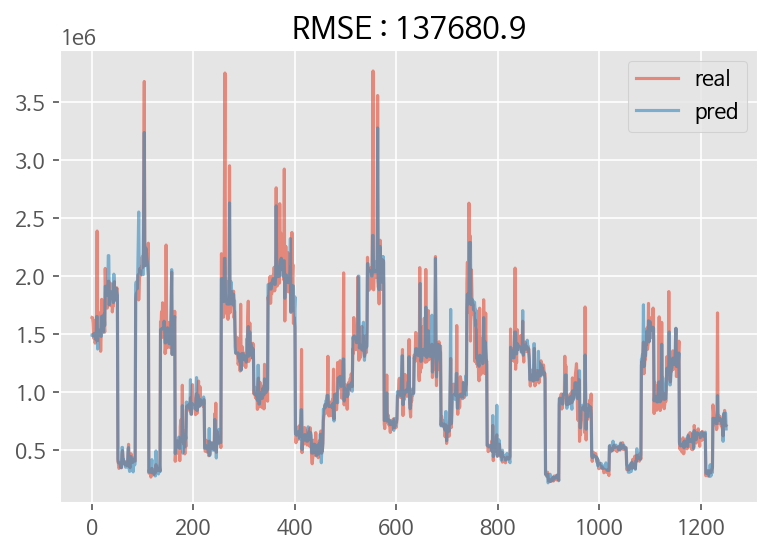

[0]	validation_0-rmse:1.08733e+06
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:748428
[10]	validation_0-rmse:573769
[15]	validation_0-rmse:482851
[20]	validation_0-rmse:435532
[25]	validation_0-rmse:401967
[30]	validation_0-rmse:380042
[35]	validation_0-rmse:361351
[40]	validation_0-rmse:345410
[45]	validation_0-rmse:331562
[50]	validation_0-rmse:319200
[55]	validation_0-rmse:307148
[60]	validation_0-rmse:296065
[65]	validation_0-rmse:285386
[70]	validation_0-rmse:275884
[75]	validation_0-rmse:267297
[80]	validation_0-rmse:257916
[85]	validation_0-rmse:249932
[90]	validation_0-rmse:242592
[95]	validation_0-rmse:235556
[100]	validation_0-rmse:227525
[105]	validation_0-rmse:221907
[110]	validation_0-rmse:216220
[115]	validation_0-rmse:210375
[120]	validation_0-rmse:205505
[125]	validation_0-rmse:200460
[130]	validation_0-rmse:196318
[135]	validation_0-rmse:191664
[140]	validation_0-rmse:187644
[145]	validation_0-rmse:183994
[150]	validation_0-rms

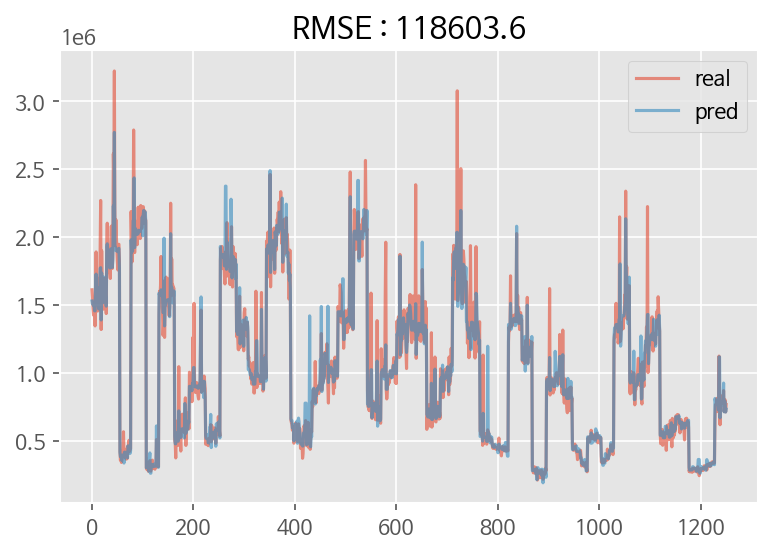

In [ ]:

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True) #5개 있다. 나눈거

#추가
models =[]

for train_idx, valid_idx in kfold.split(X,y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 1000, tree_method='gpu_hist')

  model.fit(X_train,y_train, eval_set=[(X_valid,y_valid)],
            eval_metric = 'rmse',
            early_stopping_rounds=10,
            verbose=5
            )
  
  #추가
  models.append(model)

  y_pred = model.predict(X_valid)

  make_plot()


In [ ]:
sample_submission['Weekly_Sales']=models[2].predict(test)
#sample_submission.to_csv('submission14.csv',index = False)

In [ ]:
sample_submission

,id,Weekly_Sales
0,1,1547983.62500
1,2,1428625.87500
2,3,1401553.87500
3,4,1431140.75000
4,5,1797995.25000
...,...,...
175,176,309251.56250
176,177,708466.43750
177,178,702699.50000
178,179,650044.00000


In [ ]:
pred0 = models[0].predict(test)
pred1 = models[1].predict(test)
pred2 = models[2].predict(test)
pred3 = models[3].predict(test)
pred4 = models[4].predict(test)

In [ ]:
pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4})
pred

,pred0,pred1,pred2,pred3,pred4
0,1543297.62500,1571032.75000,1547983.62500,1556527.75000,1593664.37500
1,1407585.50000,1458354.87500,1428625.87500,1416147.37500,1471432.37500
2,1419590.50000,1439395.12500,1401553.87500,1448111.75000,1442789.37500
3,1424372.50000,1437356.75000,1431140.75000,1490312.37500,1451434.62500
4,1831936.87500,1856468.00000,1797995.25000,1757880.87500,1790774.12500
...,...,...,...,...,...
175,307067.43750,309747.25000,309251.56250,305913.28125,327770.37500
176,740388.56250,731764.37500,708466.43750,734590.81250,734827.25000
177,663493.56250,664699.75000,702699.50000,647346.50000,669091.87500
178,696242.56250,687484.25000,650044.00000,691792.06250,691981.25000


- 최빈값 사용

In [ ]:
pred_mean = pred.mean(axis=1)

In [ ]:
pred_mean

0     1562501.25000
1     1436429.25000
2     1430288.12500
3     1446923.37500
4     1807011.00000
           ...     
175    311949.96875
176    730007.50000
177    669466.18750
178    683508.81250
179    692732.37500
Length: 180, dtype: float32

In [ ]:
sample_submission['Weekly_Sales']=pred_mean
sample_submission.to_csv('submission14_mean.csv',index = False)